In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

# --- Parameters ---
n = 252  # approx. one trading year
dates = pd.bdate_range("2024-01-01", periods=n)

# Simulate log returns via Geometric Brownian Motion
S0 = 25
mu = 0.15
sigma = 0.3
dt = 1/252

price = [S0]
for _ in range(1, n):
    shock = np.random.normal((mu - 0.5*sigma**2)*dt, sigma*np.sqrt(dt))
    price.append(price[-1] * np.exp(shock))
price = np.array(price)

# Open, High, Low, Close, Volume construction
df = pd.DataFrame(index=dates)
df["open"] = price * (1 + np.random.normal(0, 0.002, size=n))
df["close"] = price
df["high"] = df[["open", "close"]].max(axis=1) * (1 + np.random.uniform(0.001, 0.015, size=n))
df["low"] = df[["open", "close"]].min(axis=1) * (1 - np.random.uniform(0.001, 0.015, size=n))
df["volume"] = np.random.randint(100000, 500000, size=n)

# Inject missing data
missing_idx = np.random.choice(df.index, 5, replace=False)
df.loc[missing_idx, "close"] = np.nan
df.loc[np.random.choice(df.index, 5, replace=False), "volume"] = np.nan

# Inject outliers
df.loc[np.random.choice(df.index, 2, replace=False), "high"] *= 1.5
df.loc[np.random.choice(df.index, 2, replace=False), "volume"] *= 5

df.head(10)


,open,close,high,low,volume
2024-01-01,25.045893,25.000000,25.106628,24.871937,264134.0
2024-01-02,25.353451,25.246297,25.433061,24.885822,175713.0
2024-01-03,25.242928,25.190910,25.355092,24.896416,318335.0
2024-01-04,25.434250,25.511774,25.594675,25.358924,175418.0
2024-01-05,26.242240,26.267680,26.362557,25.896931,228232.0
2024-01-08,26.228890,26.162599,26.359807,25.957902,263038.0
2024-01-09,26.021065,26.057946,26.147253,25.669163,268383.0
2024-01-10,26.882378,26.858537,27.246761,26.530918,393719.0
2024-01-11,27.304503,27.262266,27.362478,27.072712,425996.0
2024-01-12,26.982605,27.032720,27.258259,26.947135,358722.0


In [2]:
# Info and summary
df.info()
display(df.describe())

# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-01 to 2024-12-17
Freq: B
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    252 non-null    float64
 1   close   247 non-null    float64
 2   high    252 non-null    float64
 3   low     252 non-null    float64
 4   volume  247 non-null    float64
dtypes: float64(5)
memory usage: 19.9 KB


,open,close,high,low,volume
count,252.000000,247.000000,252.000000,252.000000,2.470000e+02
mean,23.370248,23.352905,23.663770,23.156139,3.193989e+05
std,2.312871,2.301368,2.604331,2.287570,1.389704e+05
min,20.225690,20.226439,20.397134,20.021218,1.061540e+05
25%,21.484567,21.492501,21.670213,21.290967,2.244680e+05
50%,22.560745,22.515713,22.784611,22.310103,3.181180e+05
75%,24.893332,24.901431,25.083392,24.614244,4.096210e+05
max,28.726050,28.813366,40.845933,28.498194,1.286075e+06


open      0
close     5
high      0
low       0
volume    5
dtype: int64

In [4]:
import matplotlib.pyplot as plt

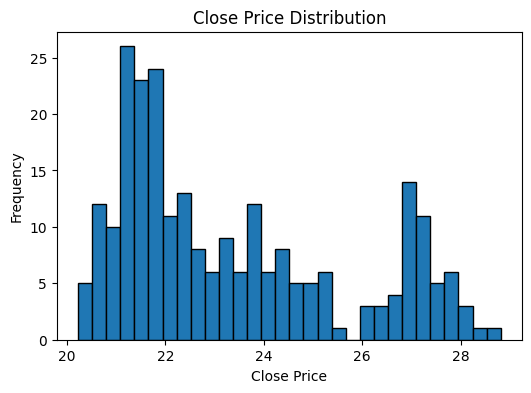

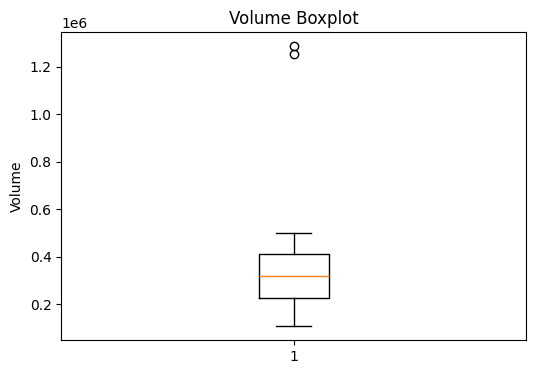

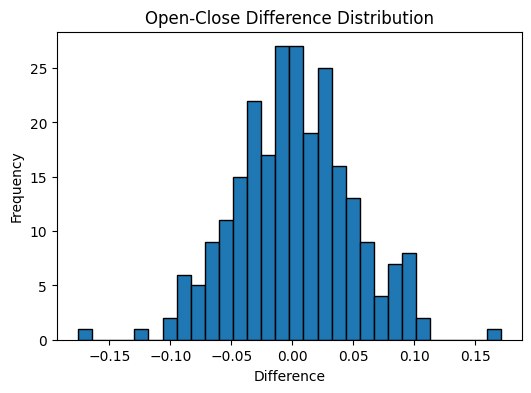

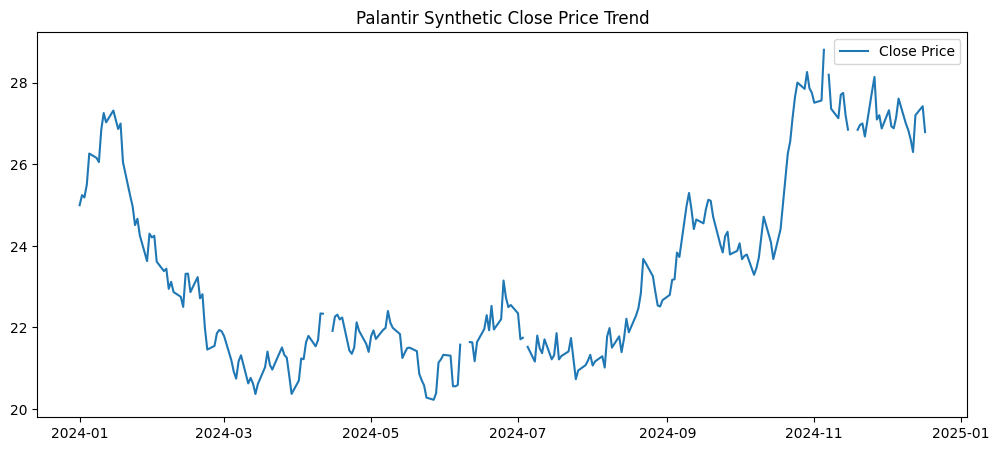

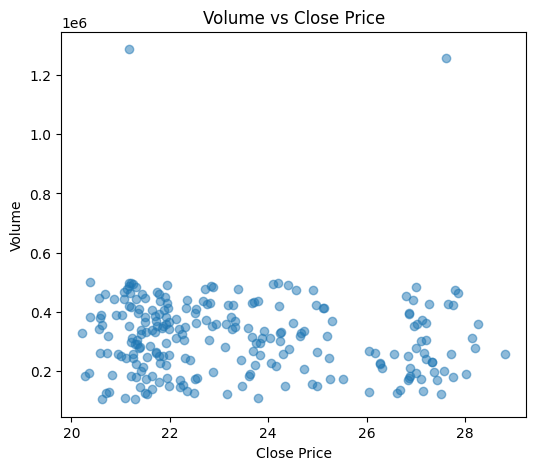

In [5]:

# Histogram for close price
plt.figure(figsize=(6,4))
plt.hist(df["close"].dropna(), bins=30, edgecolor="black")
plt.title("Close Price Distribution")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot for volume
plt.figure(figsize=(6,4))
plt.boxplot(df["volume"].dropna())
plt.title("Volume Boxplot")
plt.ylabel("Volume")
plt.show()

# Histogram for open-close difference
plt.figure(figsize=(6,4))
plt.hist((df["open"] - df["close"]).dropna(), bins=30, edgecolor="black")
plt.title("Open-Close Difference Distribution")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

# Line plot for close prices
plt.figure(figsize=(12,5))
plt.plot(df.index, df["close"], label="Close Price")
plt.title("Palantir Synthetic Close Price Trend")
plt.legend()
plt.show()

# Scatter for Volume vs Close
plt.figure(figsize=(6,5))
plt.scatter(df["close"], df["volume"], alpha=0.5)
plt.title("Volume vs Close Price")
plt.xlabel("Close Price")
plt.ylabel("Volume")
plt.show()


## Key Findings
- **Missingness**: Detected in `close` and `volume`. Must decide whether to impute (forward fill for close, mean/median for volume).
- **Outliers**: Artificially injected in `high` and `volume`. These should be capped/winsorized.
- **Distributions**: Right skew in `close` prices (expected in stock data).
- **Relationships**: Volume does not have a strong linear relationship with price (scatter is diffuse).
- **Structure**: Seasonal/temporal structure exists (daily trading days).

## Implications for Next Step
- **Feature Engineering**: Create returns, moving averages, volatility features.
- **Cleaning**: Impute missing values, cap extreme outliers.
- **Modeling Prep**: Convert time index to explicit features (lagged returns, rolling vol).
